# Plotting 3D Exploration

### July 13

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, PathPatch
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib as mpl
import numpy as np 
import pandas as pd 
import os


from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [3]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  

In [117]:
bf_1903_30 = Baseball_Field("1903_30_TeamNB_TeamA1")
game_info_1903_30 = bf_1903_30.game_obj.game_info_df.copy()
ball_pos = bf_1903_30.game_obj.new_ball_pos.copy()

In [111]:
game_info_1903_30.loc[game_info_1903_30["play_per_game"] == 103]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,n_br,prev_outs,this_play_outs,trust_this_play,Batter,Runner 1st,Runner 2nd,Runner 3rd,player_pos_and_info_agree,valid_half,trust_this_half
102,1903_30_TeamNB_TeamA1,TeamA1,TeamNB,29,103,3,Top,2145,1945,1286,2919,1771,2148,1973,2766,1185,3718,0,8638,3363,2,2,0,1,1.0,0.0,1.0,1.0,1,1,0


In [113]:
bf_1903_30.game_obj.get_ppg_from_pid(103)

108

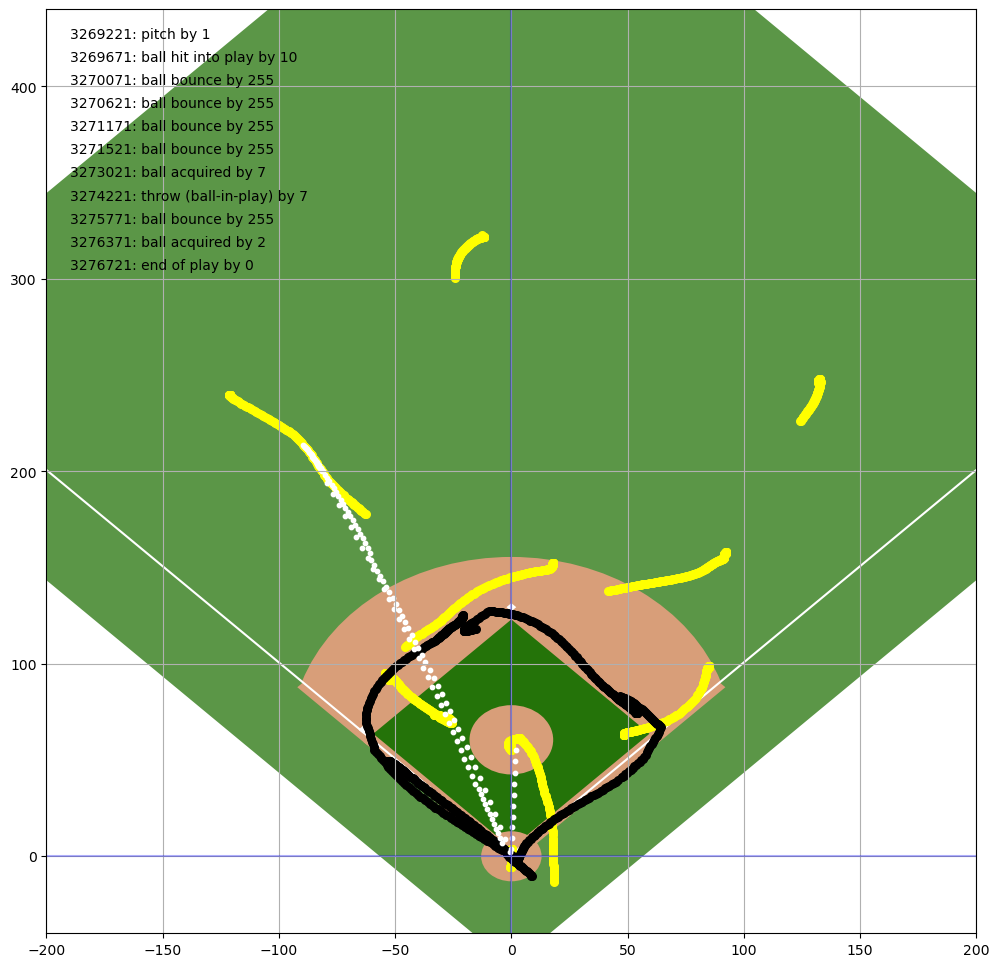

In [114]:
bf_1903_30.clear_plot()

play_id = bf_1903_30.game_obj.get_pid_from_ppg(108)

bf_1903_30.plot_all_components(play_id=play_id)

bf_1903_30.fig
# bf_1903_30.create_gif(play_id=play_id, tag="--is this a dp")

In [118]:
ball_pos.loc[ball_pos["play_id"] == 103, ["ball_position_x", "ball_position_y", "ball_position_z"]]

,ball_position_x,ball_position_y,ball_position_z
2964,1.948440,55.22580,5.536050
2965,1.676217,49.33800,5.527830
2966,1.417971,43.49850,5.453820
2967,1.173702,37.70700,5.313960
2968,0.943410,31.96380,5.108340
...,...,...,...
3080,-7.562670,16.91355,2.759220
3081,-6.665820,14.42958,2.688354
3082,-5.775720,11.96436,2.525448
3083,-4.892400,9.51783,2.270508


### Make some Axes

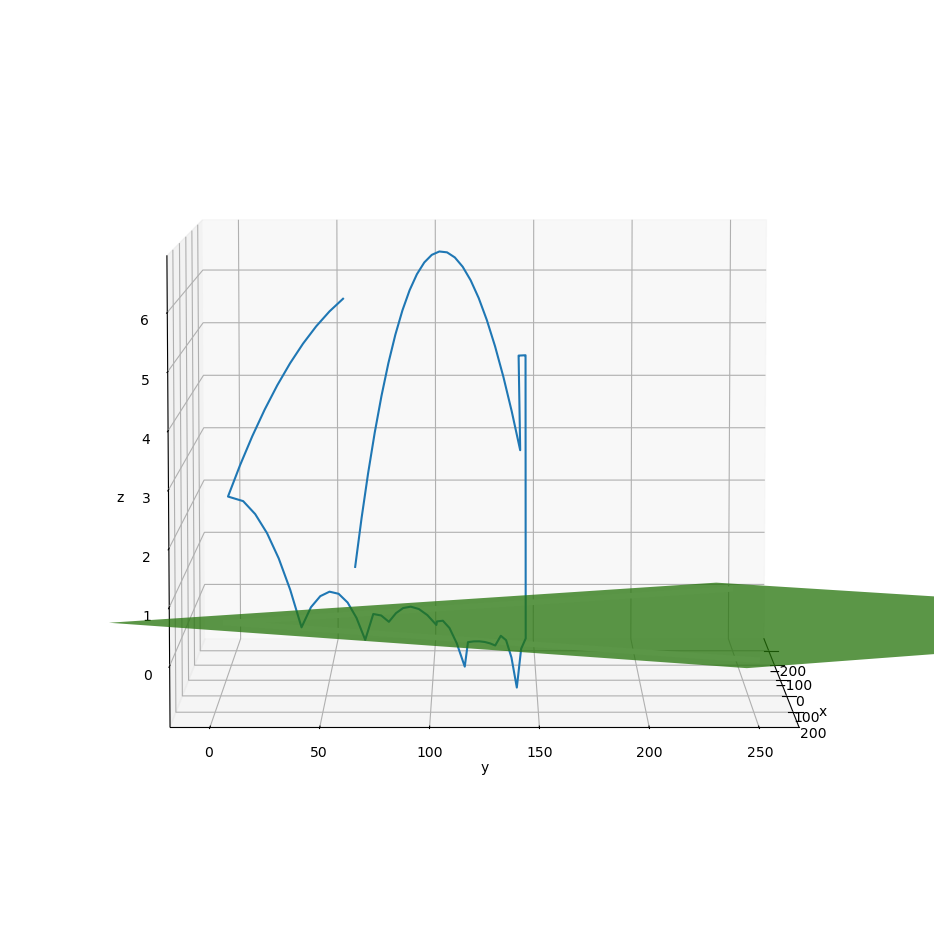

In [139]:
plt.close()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( 111, projection="3d" )
    
dirt_color = "#D89E79"
grass_color = "#247309"



# light green for the whole field
whole_field = patches.Rectangle((-40, -40), 425, 425,
                               facecolor=grass_color,
                               alpha=0.75,
                               angle=45,
                               rotation_point = (0, 0)
                              )

ax.add_patch(whole_field)
art3d.pathpatch_2d_to_3d(whole_field, z=0, zdir="z")



# inside infield dirt
"""
inside_infield_dirt = patches.Rectangle((-3, -3), 90, 90,
                                       facecolor=dirt_color,
                                       angle=45,
                                    alpha =1,
                                       rotation_point = (0, 0)
                                      )
ax.add_patch(inside_infield_dirt)
art3d.pathpatch_2d_to_3d(inside_infield_dirt, z=0.1, zdir="z")


# infield grass
infield_grass = patches.Rectangle((3, 3), 84, 84,
                               facecolor=grass_color,
                               angle=45,
                               rotation_point = (0, 0)
                              )

ax.add_patch(infield_grass)
art3d.pathpatch_2d_to_3d(infield_grass, z=0, zdir="z")

"""

"""

# pitchers mound
pitchers_mound = patches.Circle((0, 60.5), 18,
                               facecolor=dirt_color
                              )
ax.add_patch(pitchers_mound)
art3d.pathpatch_2d_to_3d(pitchers_mound, z=0, zdir="z")
"""



# foul lines
ax.plot([0, 250], [0, 250], color="white", lw=4) 
ax.plot([0, -250], [0, 250], color="white", lw=4) 

"""

R = np.linspace(0, 18, 100)
h = np.ones((1, 100))
u = np.linspace(0,  2*np.pi, 100)

x = np.outer(R, np.cos(u))
y = np.outer(R, np.sin(u)) + 60.5
ax.plot_surface(x, y, h, color=dirt_color, shade=False) # z in case of disk which is parallel to XY plane is constant and you can directly use h
"""

#ax.set_aspect("equalyz")
#ax.set_ylim(-50, 450)
#ax.set_xlim(-200, 200)
#ax.set_zlim(0,25)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.elev = 6 # 3 is roughly Center field camera angle
ax.azim = 0  # -90 is right behind home plate


ax.plot(ball_pos.loc[ball_pos["play_id"] == 61, ["ball_position_x"]], ball_pos.loc[ball_pos["play_id"] == 61, ["ball_position_y"]], ball_pos.loc[ball_pos["play_id"] == 61, ["ball_position_z"]])

fig

## I am not sure that the full field is what I should plot tbh

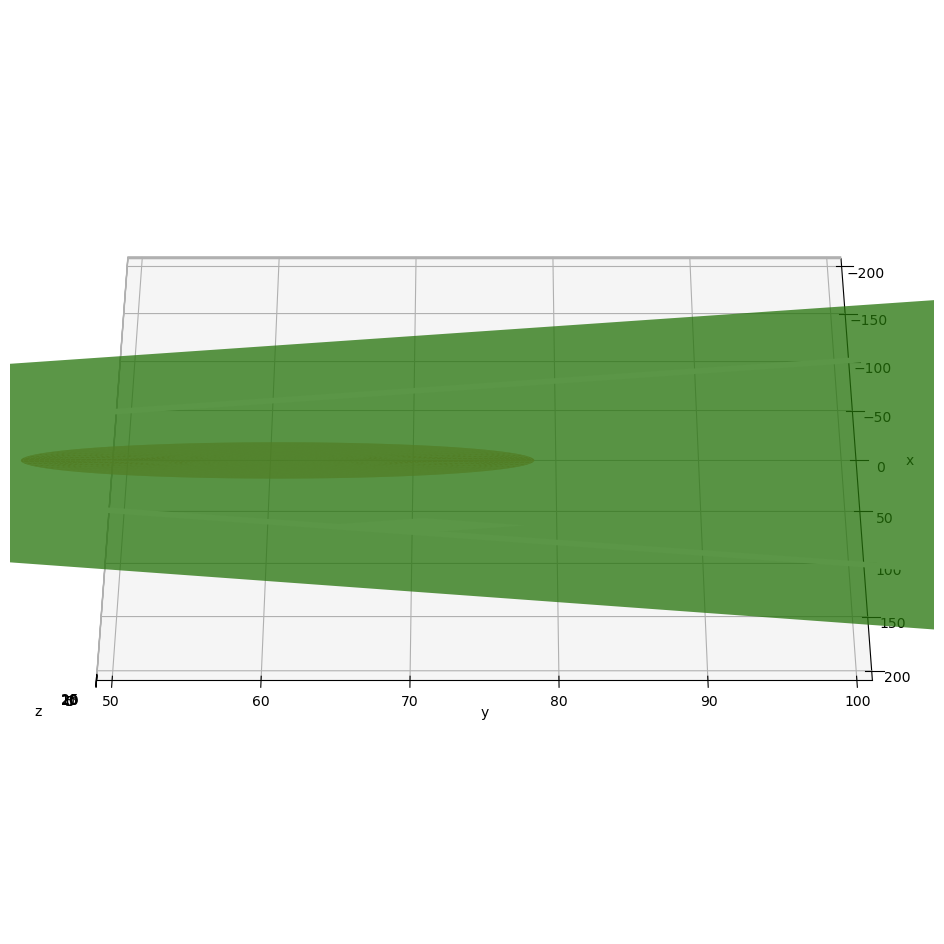

In [106]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( 111, projection="3d" )
    
dirt_color = "#D89E79"
grass_color = "#247309"



# light green for the whole field
whole_field = patches.Rectangle((-40, -40), 425, 425,
                               facecolor=grass_color,
                               alpha=0.75,
                               angle=45,
                               rotation_point = (0, 0)
                              )

ax.add_patch(whole_field)
art3d.pathpatch_2d_to_3d(whole_field, z=0, zdir="z")

# foul lines
ax.plot([0, 250], [0, 250], color="white", lw=4) 
ax.plot([0, -250], [0, 250], color="white", lw=4) 



base_1 = patches.Rectangle((90, 0), 10, 10,
                                       facecolor="white",
                                       angle=45,
                                       rotation_point = (0, 0)
                                      )

ax.add_patch(base_1)
art3d.pathpatch_2d_to_3d(base_1, z=1, zdir="z")



"""
ax.add_patch(patches.Rectangle((90, 90), 3, 3,
                               facecolor="white",
                               angle=45,
                               rotation_point = (0, 0)
                              ))

ax.add_patch(patches.Rectangle((0, 90), 3, 3,
                               facecolor="white",
                               angle=45,
                               rotation_point = (0, 0)
                              ))
"""


R = np.linspace(0, 18, 100)
h = np.ones((1, 100))
u = np.linspace(0,  2*np.pi, 100)

x = np.outer(R, np.cos(u))
y = np.outer(R, np.sin(u)) + 60.5
ax.plot_surface(x, y, h, color=dirt_color, shade=False) # z in case of disk which is parallel to XY plane is constant and you can directly use h


ax.set_aspect("equalyz")
ax.set_ylim(50, 100)
ax.set_xlim(-200, 200)
ax.set_zlim(0,25)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.elev = 45 # 3 is roughly Center field camera angle
ax.azim = 0  # -90 is right behind home plate

